In [46]:
#from google.colab import drive
#drive.mount('/content/drive')

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [48]:
%matplotlib inline

In [49]:
file_path = "./michigan-history.xlsx"
# file_path = './ts_data.xlsx'

In [50]:
df = pd.read_excel(file_path,1)
# df = pd.read_excel(file_path)

In [51]:
df.head()

,Time,Value
0,1,6223
1,2,18089
2,3,42743
3,4,30538
4,5,33084


In [52]:
df.shape

(35, 2)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

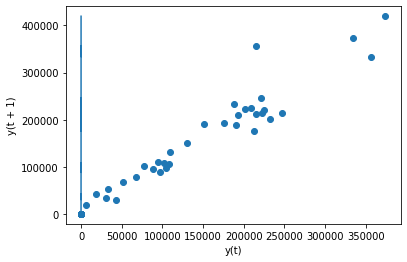

In [53]:
plt.plot(df["Value"])
pd.plotting.lag_plot(df)

In [54]:
X = df["Value"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: 1.085521
p-value: 0.995091
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616
Failed to Reject Ho - Time Series is Non-Stationary


<center><h1>Auto Regressive Model</h1></center>

$$
Y_{t}=\alpha+\beta_{1} Y_{t-1}+\beta_{2} Y_{t-2}+\ldots+\beta_{p} Y_{t-p}+\epsilon_{1}
$$

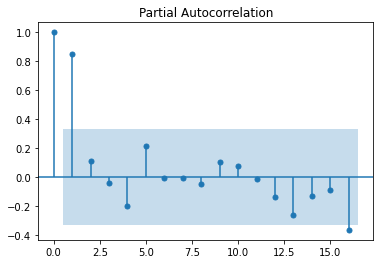

In [55]:
plot_pacf(X, lags=16);

In [56]:
df["Values_shifted"]  = df["Value"].shift()

In [57]:
df.head()

,Time,Value,Values_shifted
0,1,6223,NaN
1,2,18089,6223.0
2,3,42743,18089.0
3,4,30538,42743.0
4,5,33084,30538.0


In [58]:
df.drop('Time', axis = 1, inplace=True)

In [59]:
df.dropna(inplace=True)

In [60]:
df.head()

,Value,Values_shifted
1,18089,6223.0
2,42743,18089.0
3,30538,42743.0
4,33084,30538.0
5,52080,33084.0


In [61]:
y = df.Value.values
X = df.Values_shifted.values

In [62]:
train_size = int(len(X) * 0.80)

In [63]:
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [64]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [65]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
lr.coef_

array([0.94453589])

In [67]:
lr.intercept_

14988.304487392787

In [68]:
y_pred = lr.predict(X_test)

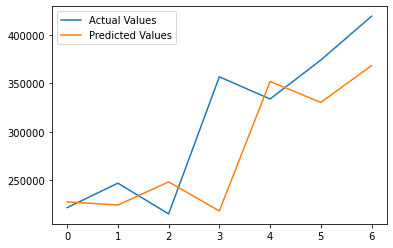

In [69]:
plt.plot(y_test[-17:], label="Actual Values")
plt.plot(y_pred[-17:], label="Predicted Values")
plt.legend()
plt.show()

In [70]:
model = ARIMA(y_train, order=(1,0,0))

In [71]:
model_fit = model.fit()

C:\Users\11659\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [72]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   27
Model:                     ARMA(1, 0)   Log Likelihood                -307.836
Method:                       css-mle   S.D. of innovations          20120.061
Date:                Fri, 20 Nov 2020   AIC                            621.672
Time:                        17:23:28   BIC                            625.560
Sample:                             0   HQIC                           622.828
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.303e+05        nan        nan        nan         nan         nan
ar.L1.y        0.9902        nan        nan        nan         nan         nan
                                    Roots           